# **Resumo**
### Este notebook fará uma pequena analise exploratória dos dados de um dataset de venda de casas, para realizar a predição de preços de novas casas com caracteristicas semelhantes as ja vendidas

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Visão geral do dataset

In [59]:
df = pd.read_csv("House.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


***

## Informações adicionais

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


***
## Traduzindo colunas


In [61]:
df.columns = ['media de lucro de venda', 'media idade das casas', 'media numero de salas','media numero de quartos', 'populacao da regiao', 'valor da casa', 'endereco']
df.head(2)

,media de lucro de venda,media idade das casas,media numero de salas,media numero de quartos,populacao da regiao,valor da casa,endereco
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


***
# Visualizando a distribuição de preços das casas por quantidade de quartos

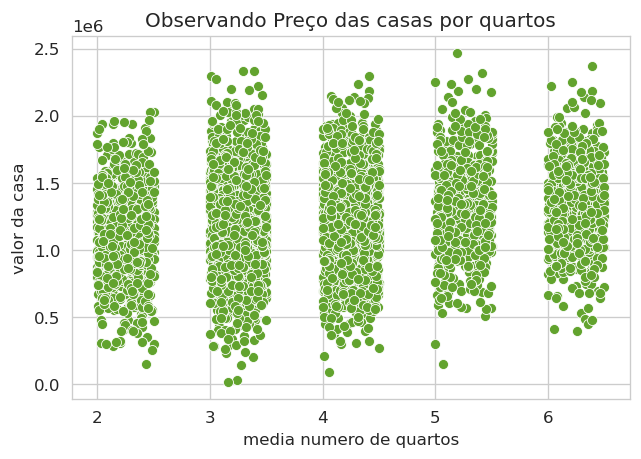

In [62]:
plt.figure(dpi=120)
plt.title("Observando Preço das casas por quartos")
sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.scatterplot(data=df, x="media numero de quartos", y="valor da casa")
plt.show()

OBS: Não há grande variação de preço por numero de quartos, mas da pra perceber que casas que contém em media 2 quartos, são um pouco mais baratas em seu **valor máximo**
***

# Visualizando a distribuição de preços das casas por quantidade de salas

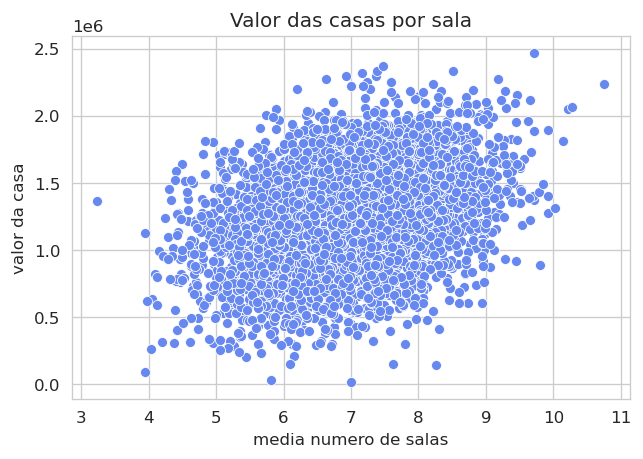

In [63]:
plt.figure(dpi=120)
sns.set_palette("coolwarm")
plt.title("Valor das casas por sala")
sns.scatterplot(data=df,x="media numero de salas", y="valor da casa")
plt.show()

OBS: obviamente, quanto maior a quantidade de salas, maior o preço da casa, em alguns poucos casos, casas com numero menor de salas sao mais caras

OBS 2: Também é possivel notar que a grande maioria das casas possuem entre 6 a 8 salas
***

# Visualizando um gráfico das casas, onde mostra a distribuição de salas por quantidade de quartos

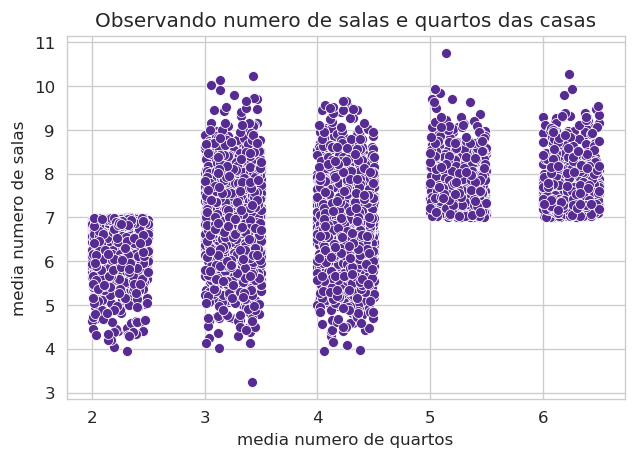

In [64]:
plt.figure(dpi=120)
sns.set_palette("Purples_r")
plt.title("Observando numero de salas e quartos das casas")
sns.scatterplot(data=df,x="media numero de quartos", y="media numero de salas")
plt.show()

OBS: Podemos ver que todas as casas com 5 quartos ou mais, possuem **pelo menos** 7 salas

OBS 2: Também observamos que casas com 2 quartos, possuem **no maximo** 7 salas
***

# Visualizando distribuição do preço da casa baseado pela idade 

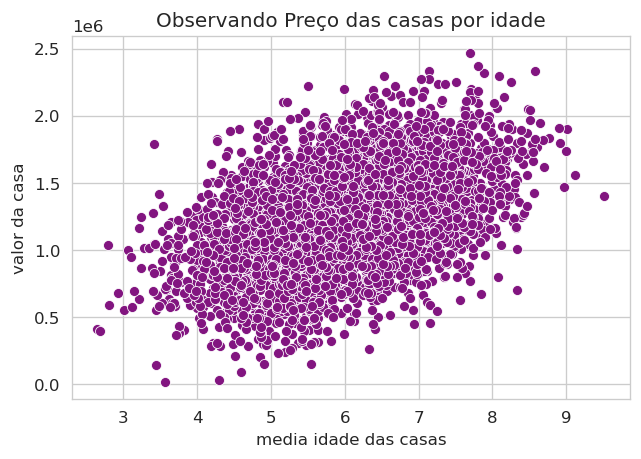

In [65]:
plt.figure(dpi=120)
sns.set_palette("BuPu_r")
plt.title("Observando Preço das casas por idade")
sns.scatterplot(data=df, x="media idade das casas", y="valor da casa")
plt.show()

OBS: E mais uma amostra linear onde indica que, quanto mais velha a casa, maior o seu valor

***
## Visualizando correlação entre as colunas

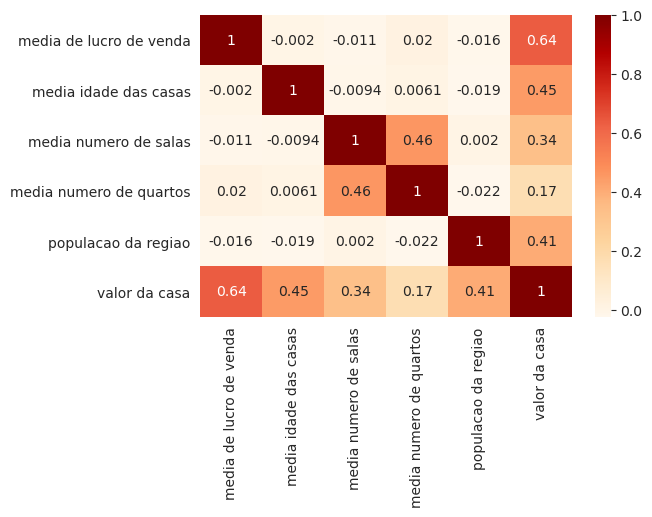

In [66]:
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot=True, cmap="OrRd")
plt.show()

***

## Visualizando distribuição de preços da casa por tamanho da população da região

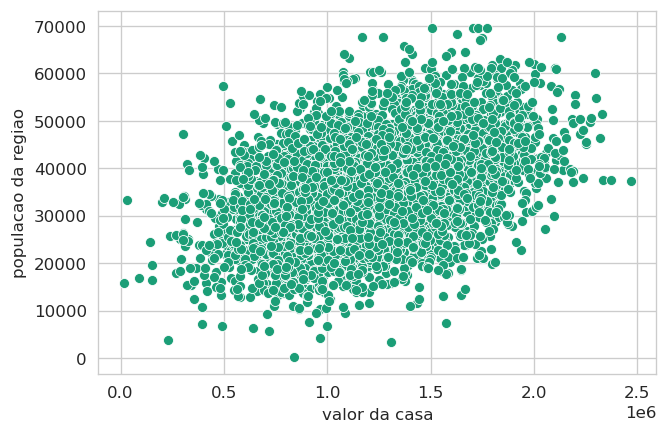

In [67]:
plt.figure(dpi=120)
sns.set_palette("Dark2")
sns.scatterplot(data=df, x='valor da casa',y='populacao da regiao')
plt.show()

OBS: Quanto maior a população, maior o preço da casa
***

## Visualizando como os dados se relacionam para definir qual modelo preditivo será implementado

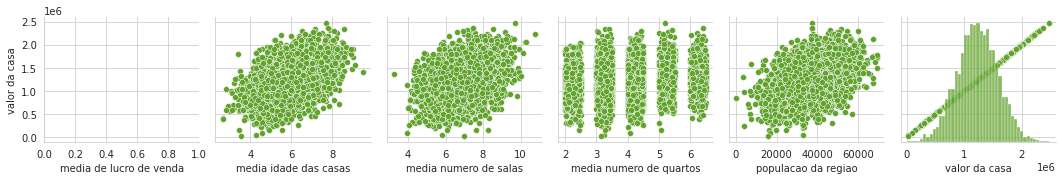

In [68]:
sns.set_palette("PiYG_r")
sns.pairplot(data=df,y_vars="valor da casa")
plt.show()

OBS: podemos observar que há um certo grau explicativo linear sobre o preço suficiente para optarmos pelo modelo Linear Regression
***

# **Preparando dados para inicio dos modelos**
##### Tirando a coluna endereco por ser uma coluna inviável para realizar o treinameneto, atribuindo ao X todas as colunas exceto o valor da casa, e ao y apenas o valor da casa

In [69]:
df.drop(columns=["endereco"], axis=1, inplace=True)

In [70]:
X = df.iloc[:,:-1]
y = df["valor da casa"]

### Importação das libs

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### Instanciando *modelos*

In [72]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=101)
lrmodel = LinearRegression()
gradmodel = GradientBoostingRegressor()
rfmodel = RandomForestRegressor()
treemodel = DecisionTreeRegressor()

### Treino dos modelos

In [73]:
treemodel.fit(Xtrain, ytrain)
lrmodel.fit(Xtrain, ytrain)
gradmodel.fit(Xtrain, ytrain)
rfmodel.fit(Xtrain, ytrain)

RandomForestRegressor()

### Guardando predições, acurácia e margem de erro

In [74]:
treepred = treemodel.predict(Xtest)
lrpred = lrmodel.predict(Xtest)
rfpred = rfmodel.predict(Xtest)
gradpred = gradmodel.predict(Xtest)

preds = [treepred, lrpred, rfpred, gradpred]

In [75]:
treescore = treemodel.score(Xtest, ytest)*100
lrscore = lrmodel.score(Xtest, ytest)*100
rfscore = rfmodel.score(Xtest, ytest)*100
gradscore = gradmodel.score(Xtest, ytest)*100

scores = [treescore, lrscore, rfscore, gradscore]

In [76]:
rmse = []
rmsle = []
for i in np.array(preds):
    rmse.append(np.sqrt(metrics.mean_squared_error(ytest, i)))
    rmsle.append(metrics.mean_squared_log_error(ytest, i)*100)

In [77]:
modelos = "DecisionTree LinearRegression RandomForest GradientBoosting".split()
scores = [treescore,lrscore,rfscore,gradscore]
ranking = pd.DataFrame({"Modelo":modelos,
                        "Score":scores,
                        "RMSE":rmse,
                        "RMSLE":rmsle
                       }).sort_values(by='RMSLE')

### Visualizando performance dos modelos

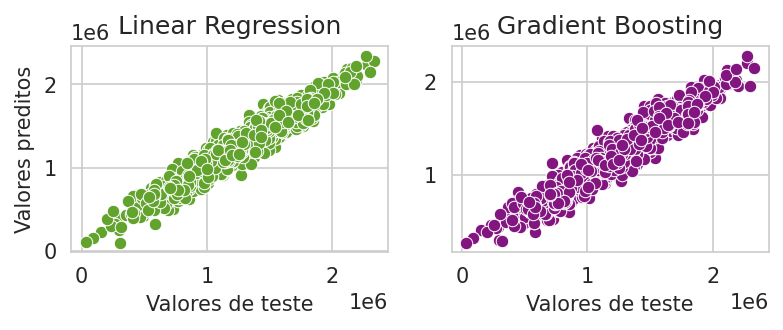

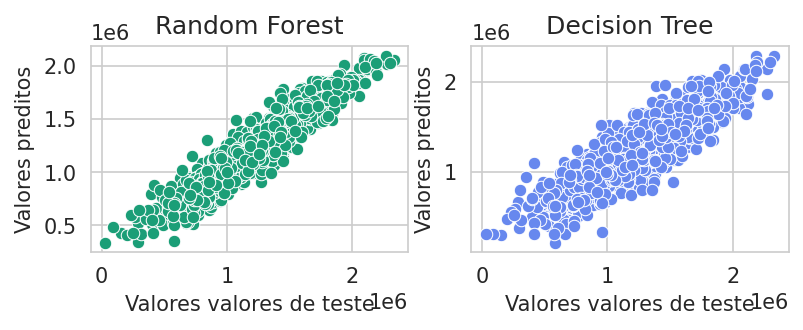

In [78]:
plt.figure(dpi=150)
plt.subplot(2,2,1)
sns.set_palette("BuPu_r")
plt.title("Linear Regression")
plt.ylabel("Valores preditos")
plt.xlabel("Valores de teste")
sns.scatterplot(ytest, lrpred)
#
plt.subplot(2,2,2)
sns.set_palette("Dark2")
plt.title("Gradient Boosting")
plt.ylabel("")
plt.xlabel("Valores de teste")
sns.scatterplot(ytest, gradpred)
#
plt.figure(dpi=150)
plt.subplot(2,2,3)
sns.set_palette("coolwarm")
plt.title("Random Forest")
plt.ylabel("Valores preditos")
plt.xlabel("Valores valores de teste")
sns.scatterplot(ytest, rfpred)
#
plt.subplot(2,2,4)
sns.set_palette("coolwarm")
plt.title("Decision Tree")
plt.ylabel("Valores preditos")
plt.xlabel("Valores valores de teste")
sns.scatterplot(ytest, treepred)
plt.show()

#### OBS: podemos observar que  os valores do eixo X(valores preditos) e do eixo Y(valores de teste) do modelo Linear Regression estão mais próximos que os demais, e os valores do modelo Decision Tree estão mais distantes
***

## Visualizando a margem de erros do modelo com melhor performance

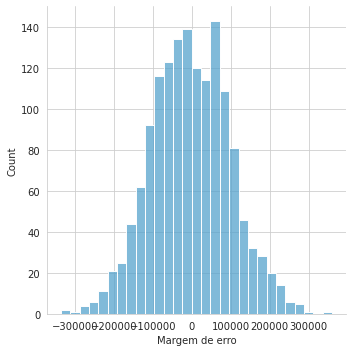

In [79]:
sns.set_palette("icefire")
sns.displot(ytest - lrpred)
plt.xlabel("Margem de erro")
plt.show()

OBS: Observamos que a margem de erro fica próxima de zero
***

# **Resumo das métricas de previsão deste modelo**
### Averiguando porcentagem da acurácia do modelo


In [80]:
ranking

,Modelo,Score,RMSE,RMSLE
1,LinearRegression,91.850609,100842.082316,1.157517
3,GradientBoosting,89.826875,112669.517312,1.748017
2,RandomForest,87.735724,123708.687748,2.206897
0,DecisionTree,75.609523,174457.395629,3.501718


## Conclusão:
o modelo de regressão Linear foi o melhor dentre os 4 usados, com a menor margem de erro e maior acurácia
***